In [87]:
from keras import applications
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os.path
import pickle

In [88]:
model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

In [89]:
Category = ["Men's_Shirts", 'Chiffon', 'Jeans']
image_names=[]


for i in range(0,len(Category)) :
    path = '/Users/Student/Downloads/visual_search/models/Data/Semi_train/' + Category[i]
    for img_path in os.listdir(path):
        if('.DS_Store' not in os.path.join(path,img_path)):
            image_names.append(img_path)
        

In [90]:
image_names

['4153_comsumer_08.jpg',
 '4154_shop_01.jpg',
 '4155_shop_02.jpg',
 '4156_comsumer_07.jpg',
 '4157_comsumer_06.jpg',
 '4158_comsumer_04.jpg',
 '4159_comsumer_05.jpg',
 '4160_comsumer_01.jpg',
 '4161_comsumer_02.jpg',
 '4162_comsumer_03.jpg',
 '4163_shop_01.jpg',
 '4164_comsumer_01.jpg',
 '4165_shop_01.jpg',
 '4166_comsumer_01.jpg',
 '4167_shop_01.jpg',
 '4168_comsumer_01.jpg',
 '4169_shop_01.jpg',
 '4170_comsumer_01.jpg',
 '4171_shop_01.jpg',
 '4172_comsumer_01.jpg',
 '4173_shop_01.jpg',
 '4174_comsumer_01.jpg',
 '4175_comsumer_08.jpg',
 '4176_shop_01.jpg',
 '4177_shop_02.jpg',
 '4178_comsumer_07.jpg',
 '4179_comsumer_06.jpg',
 '4180_comsumer_04.jpg',
 '4181_comsumer_05.jpg',
 '4182_comsumer_01.jpg',
 '4183_comsumer_02.jpg',
 '4184_comsumer_03.jpg',
 '4185_shop_01.jpg',
 '4186_comsumer_04.jpg',
 '4187_comsumer_05.jpg',
 '4188_comsumer_01.jpg',
 '4189_comsumer_02.jpg',
 '4190_comsumer_03.jpg',
 '4191_shop_01.jpg',
 '4192_shop_02.jpg',
 '4193_comsumer_01.jpg',
 '4194_comsumer_02.jpg',
 '

In [91]:
start = time.time()
Category = ["Men's_Shirts", 'Chiffon', 'Jeans']


pickled_db_path = "features_incV3/" + Category[0] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        #vgg_loaded = pickle.load(fp)
        incV3_loaded_1 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [92]:
incV3_loaded_1

array([[0.28434265, 0.7026738 , 0.36185196, ..., 0.7575488 , 0.38098428,
        0.7181923 ],
       [0.34168643, 0.18988487, 0.32110137, ..., 0.13172795, 0.59145993,
        0.23357922],
       [0.02993989, 0.2891396 , 0.07651553, ..., 0.47408667, 0.99337053,
        0.6355341 ],
       ...,
       [1.0246975 , 0.08667262, 1.1411719 , ..., 0.        , 0.6777192 ,
        0.50258625],
       [1.1807425 , 0.28363672, 0.8071758 , ..., 0.26053917, 0.5862476 ,
        0.3657753 ],
       [1.7150344 , 0.20822941, 0.9899638 , ..., 0.03251309, 0.3052306 ,
        0.15206529]], dtype=float32)

In [93]:
pickled_db_path = "features_incV3/" + Category[1] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        incV3_loaded_2 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [80]:
incV3_loaded = np.append(incV3_loaded_1, incV3_loaded_2,axis=0)

In [81]:
pickled_db_path = "features_incV3/" + Category[2] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        #vgg_loaded = pickle.load(fp)
        c = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [82]:
incV3_loaded = np.append(incV3_loaded_3, incV3_loaded,axis=0)

In [83]:
incV3_loaded.shape

(4682, 2048)

In [38]:
query_image_path= "images_for_testing/108_comsumer_03.jpg"
imgq = image.load_img(query_image_path, target_size=(224, 224))
img_dataq = image.img_to_array(imgq)
img_dataq = np.expand_dims(img_dataq, axis=0)
img_dataq = preprocess_input(img_dataq)
incV3_feature_query = model.predict(img_dataq)
incV3_feature_np_query = np.array(incV3_feature_query)
incV3_feature_np_query = incV3_feature_np_query.flatten()

In [39]:
incV3_feature_np_query.shape

(2048,)

In [43]:
from scipy.spatial import distance

similarity = []
count = 0

for i in incV3_loaded:
    count = count+1
    d = distance.cosine(i,incV3_feature_np_query)
    sim = 1-d
    similarity.append((sim,image_names[count-1]))


In [96]:
similarity

[(0.5148361921310425, '4153_comsumer_08.jpg'),
 (0.5521531701087952, '4154_shop_01.jpg'),
 (0.5259150862693787, '4155_shop_02.jpg'),
 (0.45648518204689026, '4156_comsumer_07.jpg'),
 (0.47149893641471863, '4157_comsumer_06.jpg'),
 (0.4246079623699188, '4158_comsumer_04.jpg'),
 (0.4285597503185272, '4159_comsumer_05.jpg'),
 (0.5289264917373657, '4160_comsumer_01.jpg'),
 (0.3810325860977173, '4161_comsumer_02.jpg'),
 (0.5177168846130371, '4162_comsumer_03.jpg'),
 (0.5076761245727539, '4163_shop_01.jpg'),
 (0.4445158839225769, '4164_comsumer_01.jpg'),
 (0.4389200806617737, '4165_shop_01.jpg'),
 (0.5368406176567078, '4166_comsumer_01.jpg'),
 (0.49454453587532043, '4167_shop_01.jpg'),
 (0.5366716980934143, '4168_comsumer_01.jpg'),
 (0.4933312237262726, '4169_shop_01.jpg'),
 (0.45886358618736267, '4170_comsumer_01.jpg'),
 (0.4956457018852234, '4171_shop_01.jpg'),
 (0.45726606249809265, '4172_comsumer_01.jpg'),
 (0.48554307222366333, '4173_shop_01.jpg'),
 (0.5296407341957092, '4174_comsumer_01

In [45]:
def show_img(path):
    img =imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()

Query image ==========================================


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


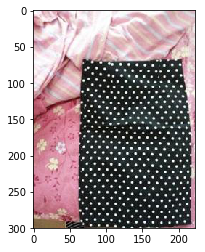

Result images ========================================
similarity 0.7386671304702759


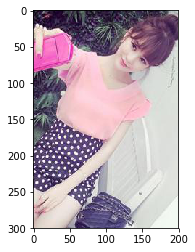

similarity 0.7310578227043152


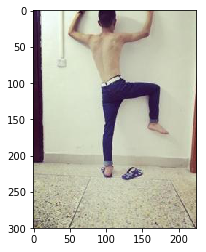

similarity 0.7291186451911926


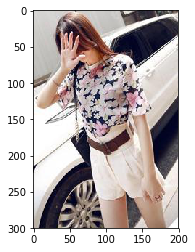

similarity 0.728773295879364


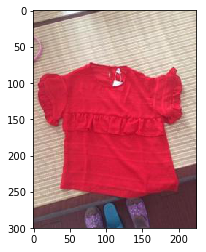

similarity 0.7268291115760803


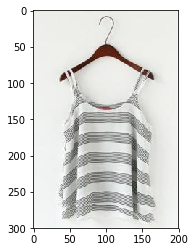

similarity 0.7243027091026306


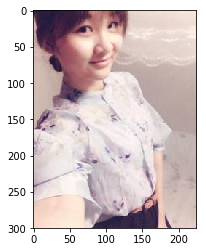

In [85]:
# After sorting images through similarity
des_similarity = sorted(similarity,reverse=True)
des_similarity =des_similarity[:6]


path1= '/Users/Student/Downloads/visual_search/models/Data/total_data/'

print ('Query image ==========================================')
show_img(query_image_path)


print ('Result images ========================================')
for i in range(0,len(des_similarity)):
    print("similarity",des_similarity[i][0])
    result_image_path = path1+ "/"+des_similarity[i][1]
    if(os.path.isfile(result_image_path) ):
        show_img(result_image_path)
        
        
    
end = time.time()

In [84]:
des_similarity

[(0.7386671304702759, '14399_shop_01.jpg'),
 (0.7310578227043152, '12003_comsumer_04.jpg'),
 (0.7291186451911926, '14388_shop_01.jpg'),
 (0.728773295879364, '13077_comsumer_03.jpg'),
 (0.7268291115760803, '14451_shop_01.jpg'),
 (0.7243027091026306, '13258_comsumer_01.jpg')]

In [86]:
total_time_main = end - start
print("total_time_main", total_time_main)

total_time_main 1819.1351161003113
